<img src = "../../Data/bgsedsc_0.jpg">
$\newcommand{\bb}{\boldsymbol{\beta}}$
$\DeclareMathOperator{\Gau}{\mathcal{N}}$
$\newcommand{\bphi}{\boldsymbol \phi}$
$\newcommand{\bpi}{\boldsymbol \pi}$
$\newcommand{\bx}{\boldsymbol{x}}$
$\newcommand{\by}{\boldsymbol{y}}$
$\newcommand{\bmu}{\boldsymbol{\mu}}$
$\newcommand{\bS}{\boldsymbol{\Sigma}}$
$\newcommand{\whbb}{\widehat{\bb}}$
$\newcommand{\hf}{\hat{f}}$
$\newcommand{\hy}{\hat{y}}$
$\newcommand{\tf}{\tilde{f}}$
$\newcommand{\ybar}{\overline{y}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\Var}{Var}$
$\newcommand{\Cov}{Cov}$
$\newcommand{\Cor}{Cor}$

# Classification

Here collect important but more advanced material on classification 


In [2]:
import pandas as pd
%matplotlib inline
# This is a Python module that contains plotting commands
import matplotlib.pyplot as plt
# the following provides further tools for plotting with dfs
import seaborn as sns 

#import auxiliar functions
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(os.path.dirname(currentdir))
sys.path.insert(1, parentdir)
from utils.helper_functions import *

In [3]:
spam = pd.read_csv("../../Data/spam_small_train.csv")

## Bayes classifiers

An entirely different - but turns out to be related (hence included here) - approach to classification is to built a **joint model** for

$$
p(\bx,y)
$$

as opposed for the conditional 

$$
p(y | \bx)
$$

that the previous approach we consider does. The fact that the joint model gives a recipe for generating data makes this approach be referred to as **generative**. Analogous is the **inverse regression** approach to linear regression

Bayes classifiers come up with a joint model by decomposing the joint probabilities the other way round: 

$$p(\bx,y) = p(y) p(\bx | y)$$

Focusing on binary classification, one learns 

1. $p(y=1)$ - this is trivial
2. $p(\bx | y=1)$ and $p(\bx | y=0)$; the two conditional distributions

With these, predictive probabilities for the class are obtained using the **Bayes theorem** (hence the name) 

$$p(y =1 | \bx) = { p(\bx | y=1) p(y =1) \over p(\bx | y=1) p(y =1)  + p(\bx | y=0) p(y =0)} $$ 

The challenge is to come up with tractable and useful models for $p(\bx |y)$ - non-trivial since we typically have 10ths/100ds/1000ds of features

Two off-the-shelf options are: 

1. $\bx | y = i \sim \Gau(\bmu_i, \bS)$, for $i=0,1$; why common variance? The resultant classifier is known as **Fisher discriminant analysis**
2. $p(\bx | y = i)  = \prod_{j=1}^p p_{i,j}(x_j)$ for $\bx = (x_1,\ldots,x_p)^T$; the resultant classifier is known as **naive Bayes**

It is well known, e.g. since Efron (1975, JASA), that discriminant analysis is equivalent to logistic regression with specific coefficients - the article shows that it is not that good idea to use the former

Naive Bayes is not functionally related to logistic regression but theory exists about their relative performance. In a nutshell, naive Bayes classifiers reach near-optimal performance with smaller sample sizes but their optimal performance is worse than that of logistic regression

Still, subject matter knowledge and more clever modelling on $p(\bx|y)$ can improve the performance of Bayes classifiers

Lets revisit an analysis we did with the spam dataset and appreciate the implicity Bayes classifier feel to it!

C:\Users\joan.verdu\.conda\envs\r-tutorial\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\joan.verdu\.conda\envs\r-tutorial\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\joan.verdu\.conda\envs\r-tutorial\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\jo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002776A744348>,
      dtype=object)

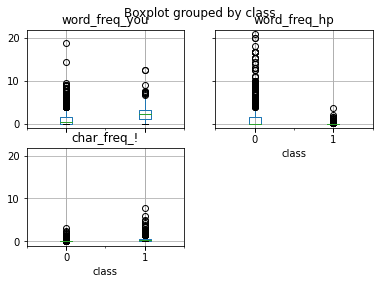

In [4]:
spam.boxplot(column=["word_freq_you","word_freq_hp","char_freq_!"], by = "class")

## Ordinal regression

This is to deal with ordinal data, i.e., data $y_i$ that take $K$ distinct values, say from 1 to $K$, but where values are comparable, i.e., $k$ is less than $k+1$, e.g., wine quality data. This is in-between regression and classification. We can adapt the multiclass and regression ideas to this context. 

### Cumulative models

This is the most direct such adaptation of linear regression and multiclass to ordinal data. The comulative logistic model specifies that: 

$$p(y_i = j) = {1 \over 1 + e^{f(\bx_i,\bb) - a_j}}  - {1 \over 1 + e^{f(\bx_i,\bb) - a_{j-1}}}$$

where as usual $f(\bx_i,\bb) = \bphi_i^T \bb$ but where in this case $\bphi$ *does not* contain an intercept - this is the role of the $a_j$s. 

The model is equivalent to:

$$P(y_i \leq j) = {1 \over 1 + e^{f(\bx_i,\bb) - a_j}}$$

and you can notice the connection to logistic regression. A couple of observations: 
 + Note the common $\bb$ across levels: this is in line with linear regression
 + By expanding the linear predictor we write above that  
 $$P(y_i \leq j) = {1 \over 1 + e^{\bphi_i^T\bb - a_j}}$$
 whereas the logistic binary regression would write as:
 $$P(y_i = 1) = {1 \over 1 + e^{-\bphi_i^T\bb - a_j}}$$
 The reason for the different sign is for interpretation only (as a predictive model this makes no difference): if a feature $j$ is positively correlated with $y_i$ then in the proposed formulation the larger $\beta_j$ the more to the right the distribution of $y_i$ shifts.
 + This model also can be estimated using efficient optimization
 + This model can be equivalently formulated in terms of **latent variables** and threshold levels $a_1,\ldots,a_K$

### Last glass of wine... 

Incredibly (but consistently with its poor support for good quality Stats) there is no module in Python (not just sklearn) for ordinal regression. I have my own functions...